            Daily Temp
2016-02-01      27.152
2016-02-02      27.066
2016-02-03      27.880
2016-02-04      28.542
2016-02-05      28.712
...                ...
2019-02-24      27.467
2019-02-25      26.238
2019-02-26      26.155
2019-02-27      25.768
2019-02-28      25.787

[1124 rows x 1 columns]


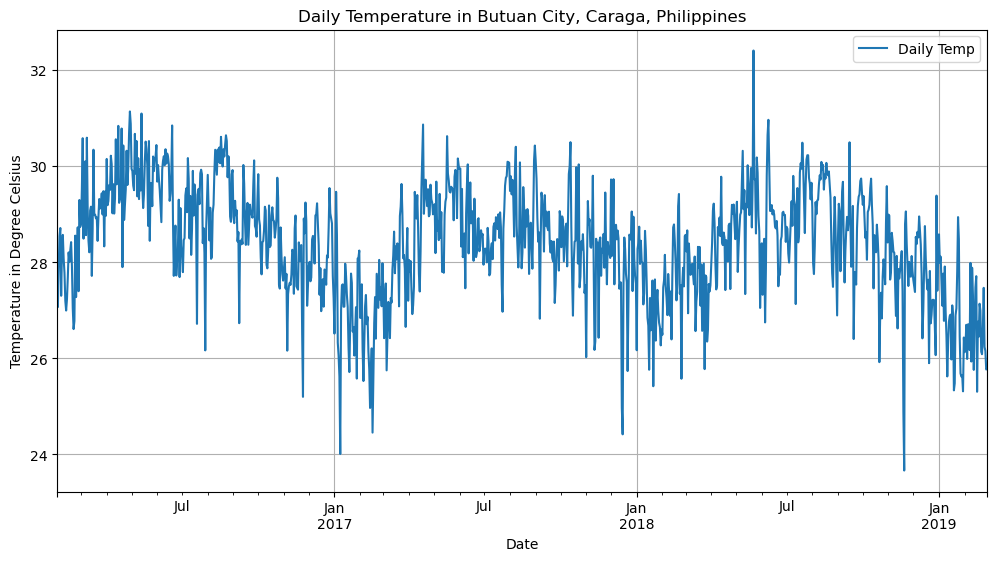

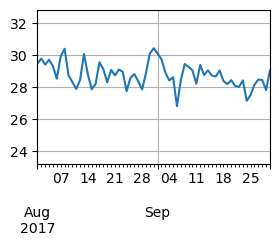

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
temp = pd.read_csv('F:\Jan_Lenovo\My Documents\PhD in UTC\Research\janntinio\dataset\Daily Temperature - Butuan - Feb 2016 to 2019.csv')

# Generate a date range for the index
dates = pd.date_range(start='2016-02-01', periods=len(temp), freq='D')

# Assign the date range to the dataframe's index
temp.index = dates

print(temp)

# Plot the time series data.
temp.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Temperature in Degree Celsius')
plt.title('Daily Temperature in Butuan City, Caraga, Philippines')
plt.grid(True)
plt.show()

#Zoom in on a certain time period
temp.plot(figsize=(3, 2), legend=False)
plt.xlim('2017-08-01', '2017-09-30')
plt.grid(True)
plt.show()

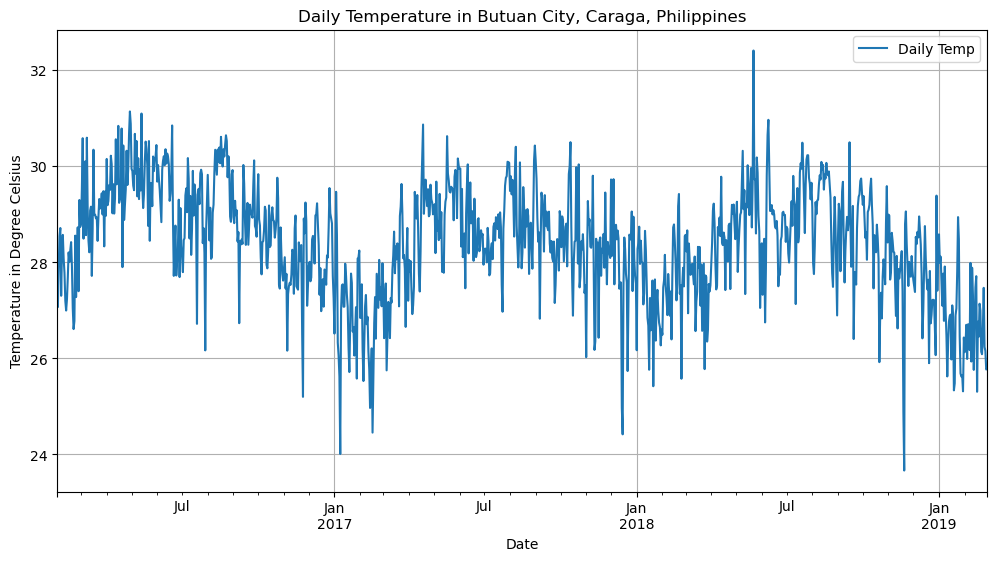

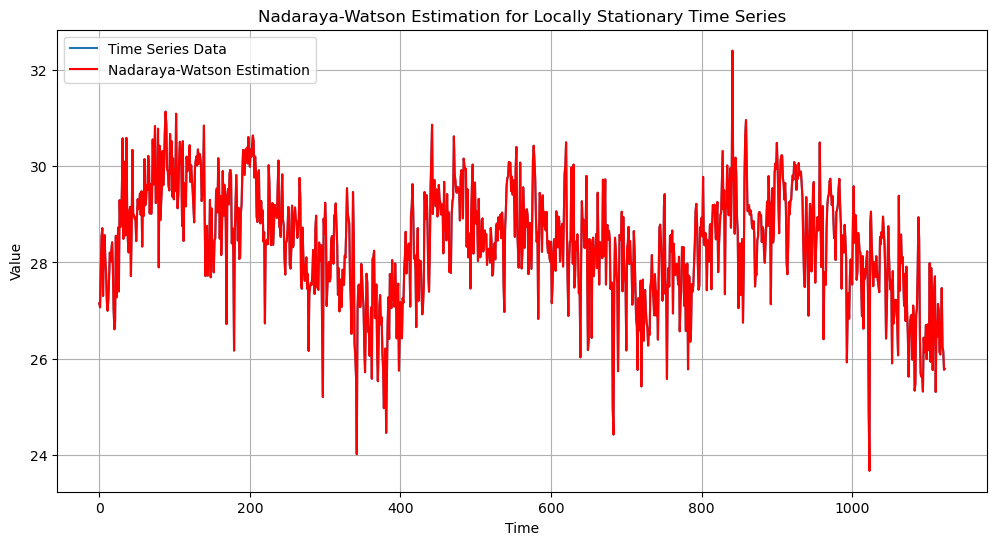

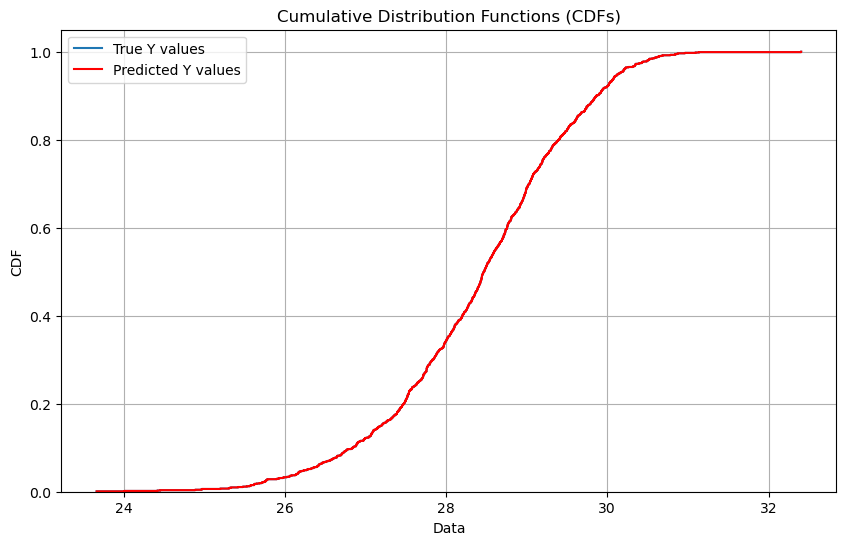

1-Wasserstein Distance: 0.0


In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Load the data
temp = pd.read_csv('F:\Jan_Lenovo\My Documents\PhD in UTC\Research\janntinio\dataset\Daily Temperature - Butuan - Feb 2016 to 2019.csv')

# Generate a date range for the index
dates = pd.date_range(start='2016-02-01', periods=len(temp), freq='D')

# Assign the date range to the dataframe's index
temp.index = dates

#print(temp)

# Plot the time series data.
temp.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Temperature in Degree Celsius')
plt.title('Daily Temperature in Butuan City, Caraga, Philippines')
plt.grid(True)
plt.show()

def nadaraya_watson_local_estimation(x, y, x_pred, kernel_width):
    """
    Calculate the Nadaraya-Watson estimator for locally stationary time series data.

    Parameters:
    - x: Array of input time points.
    - y: Array of corresponding time series values.
    - x_pred: Array of input time points for which predictions are to be made.
    - kernel_width: Width of the kernel function.

    Returns:
    - y_pred: Array of predicted time series values.
    """
    y_pred = []

    for x_star in x_pred:
        # Find the indices of data points within the bandwidth of x_star
        in_bandwidth = np.abs(x - x_star) <= kernel_width
        
        # Calculate the kernel weights for data points within the bandwidth
        kernel_weights = ((2*math.pi)**(-5))*np.exp(-(x[in_bandwidth] - x_star) ** 2 / (2 * kernel_width ** 2))
        kernel_weights_local = ((2*math.pi)**(-5))*np.exp(-(0) ** 2 / (2 * kernel_width ** 2))

        # Calculate the weighted average of y values using the kernel weights
        weighted_sum = np.sum(kernel_weights_local*kernel_weights * y[in_bandwidth])
        total_weight = np.sum(kernel_weights_local*kernel_weights)

        # Calculate the predicted y value
        if total_weight > 0:
            y_star = weighted_sum / total_weight
        else:
            y_star = 0  # Default prediction if total weight is 0

        y_pred.append(y_star)

    return np.array(y_pred)


y = temp['Daily Temp'].values
# Drop the first row
#y = y.drop(0)

# Reset the index after dropping the first row
#y = y.reset_index(drop=True)

t = np.arange(len(y))
    
# Define the input time points for prediction
t_pred = np.linspace(0, len(t) - 1, len(t))

    
# Set the kernel width (you can adjust this parameter)
kernel_width = 0.05
    
# Calculate the Nadaraya-Watson estimator for locally stationary time series
y_pred = nadaraya_watson_local_estimation(t, y, t_pred, kernel_width)
    
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, y, label="Time Series Data")
plt.plot(t_pred, y_pred, label="Nadaraya-Watson Estimation", color='r')
plt.legend()
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Nadaraya-Watson Estimation for Locally Stationary Time Series")
plt.show()

# Generate two sets of random data
data1 = y
data2 = y_pred

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.step(data2_sorted, cdf2, where='post', label='Predicted Y values', color='r')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

# Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = cdf2

# Compute the 1-Wasserstein distance
distance = wasserstein_distance(distribution1, distribution2)

print("1-Wasserstein Distance:", distance)